<a href="https://colab.research.google.com/github/sophiehook/modellingHDPE/blob/main/modellingHDPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing any supporting libraries needed for the program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

In [ ]:
# Any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic
%matplotlib inline

In [ ]:
# Reads in the excel file using pandas 
df = pd.read_excel('HDPE_data.xlsx', sheet_name='fullSheet')

In [ ]:
def menuContent():
    # Prints the menu options for HDPE % content

    # Parameters:
    #    None

    # Returns:
    #    Prints the menu when called in a later function   

    print("Choose the % content HDPE:")
    print("[1] - 70%")
    print("[2] - 80%")
    print("[3] - 90%")
    print("[4] - 100%")
    print("[q] - Quit")

In [ ]:
def menuInput():
    # Prints the menu options for HDPE input/ intermediary property

    # Parameters:
    #    None

    # Returns:
    #    Prints the menu when called in a later function   

    print("Choose an input (1-3) or intermediary (4-6) feature of HDPE:")
    print("[1] - Weight Average")
    print("[2] - Number Average")
    print("[3] - Dispersity")
    print("[4] - Density")
    print("[5] - Degree of Crystallinity")
    print("[6] - Melting Point")
    print("[q] - Quit")

In [ ]:
def menuImputation():
    # Prints the menu options for imputation choices

    # Parameters:
    #    None

    # Returns:
    #    Prints the menu when called in a later function   

    print("Choose if you would like to use imputation and if so, which method:")
    print("[1] - No Imputation")
    print("[2] - Multivariate Imputation")
    print("[3] - Mean Univariate Imputation")
    print("[4] - Median Univariate Imputation")
    print("[5] - k Nearrest Neighbours")
    print("[q] - Quit")

In [ ]:
def menuOutput():
    # Used in printOutput() and printTestStand() to print the output options and then submenu options with the associated test standards depending on the output selected 

    # Parameters:
    #    None

    # Returns:
    #    Menu which contains the list of lists with HDPE output properties and their corresponding test standards

    menu = [["Impact strength",["ASTM D256", "All Test Standards"]], 
            ["Melt Flow Index", ["5kg", "2.16kg", "Any Mass",["ASTM D1238", "ISO 1133", "All Test Standards"]]],
            ["Elongation at Break", ["ASTM D638", "ISO 527", "All Test Standards"]],
            ["Tensile Strength at Yield"],
            ["Ultimate Tensile strength",["ASTM D638", "ISO 527", "All Test Standards"]],
            ["Young\'s Modulus", ["ASTM D638", "ISO 527", "All Test Standards"]],
            ["Quit"]]
     
    return menu

In [ ]:
def printOutput(menu):
    # Prints the list of list menu in the same format as the other menu options 

    # Parameters:
    #    Menu - list of strings

    # Returns:
    #    Nothing

    print("Choose an output feature of HDPE:")

    # Two loops to loop through each each index position in the outer list level 
    for index, item in enumerate(menu):
        for index in range(0,6):

            # Adds the [] around the index to make the menus appear consistent
            menuIndex = "[" + str(index + 1) +"] " 

            # Prints index position 0 as that corresponds to the HDPE output property in menu
            print(menuIndex, menu[index][0])
            
        # Index position 6 in the menu is quit so this small loop keeps the consitent format   
        for index in [6]:
            print('[q] ', menu[index][0])
            
            break
            
        break
        

In [ ]:
def printTestStand(choice, menu):   
    # Uses the menu list of lists and the choice from the user input to print the correct submenu options depending on the output property selected 
    # Creates a list of the specified test standrads for use later in the program to filter the data frame

    # Parameters:
    #    Menu - list of strings containing output props and corresponding test standards 
    #    Choice - interger of user input to corresponding menu option


    # Returns:
    #    TestStandard - list of strings containing the user selected test standards 

    testStandard = []

    # Melt flow index had two levels of submenus compared to the other output properties
    if menu[choice][0] == "Melt Flow Index":

      # While loop which breaks once both melt flow index TS options have valid used input
      both = True 
      while both:
        
        print('')
        print("Now choose a mass used to measure melt flow index:")

        # Loops though each the first level of mass options for MFI
        for index, item in enumerate(menu[choice][1]):
            for index in [0,1,2]:        
                subMenuIndex = "[" + str(index + 1) +"] " 
                print(subMenuIndex, menu[choice][1][index])
                

            # Get user input - 1 so it will correspond to the index in the list
            print('')   
            massChoice = int(input("Please select a number option or q from the menu: ")) - 1 
            
            # If the user input exists in the range then the mass string is added to the testStandard list and mass is made true so the next loop is entered
            if massChoice in range(0, len(menu[choice][1])):
                testStandard += [menu[choice][1][massChoice]]
                mass = True
                break

            # Until a valid option is inputted the outer while loop will run
            else:
                print("Please enter a valid choice off the menu")

        # Once a valid mass option is recorded the test standards is requested
        while mass:
            for index in [3]:
                print('')
                print("Now choose a test standard used to measure melt flow index:")
                
                # Loops through the inner list level for MFI to print the test standard options
                for index, item in enumerate(menu[choice][1][3]):
                    subMenuIndex = "[" + str(index + 1) +"] " 
                    print(subMenuIndex, menu[choice][1][3][index])
                    
                # Get user input - 1 so it will correspond to the index in the list
                print('')
                testChoice = int(input("Please select a number option from the menu: ")) - 1 

                # If the user input exists in the range then the mass string is added to the testStandard list 
                if testChoice in range(0, len(menu[choice][1][3])):
                    testStandard += [menu[choice][1][3][testChoice]] 

                    # Setting both and mass to false indicating that there are two valid user inputs 
                    both = False
                    mass = False
                    break
                
                # The while loop will run until there is a valid option for MFI test standard
                else:
                  print("Please enter a valid choice off the menu")      
        break 
          
    else:

        #  While loop to deal with all other output props with on level of test standards
        while True: 
          print('')
          print("Now choose a test standard:")

          # Loop throug menu and print corresponding test standards depending on the user input 'choice' 
          for index, item in enumerate(menu[choice][1]):
              subMenuIndex = "[" + str(index + 1) +"] " 
              print(subMenuIndex, menu[choice][1][index])

          # Get user input for the test standars
          print('')
          actionChoice = int(input("Please select a number option from the menu: ")) - 1 

          # If the user input was valud then the correspinding test standard is added to the list and breaks the while loop 
          if actionChoice in range(0, len(menu[choice][1])):
              testStandard += [menu[choice][1][actionChoice]]
              break 
        
          # Runs the while loop until user inputs a valid option
          else:
              print("Please enter a valid choice off the menu")

    return testStandard

In [ ]:
def getMenu():
    # Prints all the menu options and stores the users choices to filter the data frame depending on the choices

    # Parameters:
    #    None

    # Returns:
    #    inputProp - string containing the input or intermediary prop depending on the option selected 
    #    outputProp - string containing the output property 
    #    blend - string containing % of HDPE
    #    imputation - string containing method of imputation if any
    #    ts - list containing any output property test standards 

    quit = False

    # Each menu for each condition has a seperate while loop which runs until there user chooses a valid option 
    while True:

        # Print the HDPE % content menu
        print()
        menuContent() 
        print()
        
        
        # Get user input  
        optionContent = input("Please select a number option or q from the menu: ")
        
        # if statment block which assigns the corresponding blend to the user input and breaks the loop if it is a valid option
        if optionContent == "1":
            blend = '70'
            break
            
        elif optionContent == "2":
            blend = '80'
            break
            
        elif optionContent == "3":
            blend = '90'
            break
            
        elif optionContent == "4":
            blend = '100'
            break
            
        # If user quits assign the variable quit to true and break this menu's loop
        elif optionContent == 'q':
            quit = True
            break
            
        # Continues the loop until a valid option is inputted
        else:
            print()
            print("Please enter a valid option from the menu")
            
    # Input/ intermediary property menu loop
    while True:
        
        # If user has already quit in a previous submenu, break this menu's loop
        if quit:
            break
            
        # Print input/intermed menu 
        print()
        menuInput() 
        print()

        optionOne = input("Please select a number option or q from the menu: ")
        
        # Assigns the value to the inputProp var depending on the user input and breaks the loop
        if optionOne == "1":
            inputProp = 'Weight Average (g/mol)'
            break
            
        elif optionOne == "2":
            inputProp = 'Number Average (g/mol)'
            break
            
        elif optionOne == "3":
            inputProp = 'Dispersity (Mw/Mn)'
            break
            
        elif optionOne == "4":
            inputProp = 'Density (g/cm3)'
            break
            
        elif optionOne == "5":
            inputProp = 'Degree of Crystallinity (%)'
            break

        elif optionOne == "6":
            inputProp = 'Melting Point (°C)'
            break
            
        # If user quits assigns the variable quit to true and break this menu's loop
        elif optionOne == 'q':
            quit = True
            break
            
        # Continues the loop until a valid option is inputted
        else:
            print()
            print("Please enter a valid option from the menu")

        
    while True:

        # If user has already quit in a previous submenu, break this menu's loop
        if quit:
            break
        
        # Assign var menu to the list of lists with output prop test standards
        # Print the menu options
        print()
        menu = menuOutput()
        printOutput(menu)
        print()

        optionTwo = input("Please select a number option or q from the menu: ")

        # Assign the ouput property name as a string depending on the user input  
        if optionTwo == "1":
            outputProp = 'Impact Strength (J/m)'
        
        elif optionTwo == "2":
            outputProp = 'Melt Flow Index (g/10 min)'
        
        elif optionTwo == "3":
            outputProp = 'Elongation at Break (%)'

        elif optionTwo == "4":
            outputProp = 'Tensile Strength at Yield (MPa)'
            ts = 'none'
            break
        
        elif optionTwo == "5":
            outputProp = 'Ultimate Tensile Strength (MPa)'

        elif optionTwo == "6":
            outputProp = 'Young\'s Modulus (MPa)'

        # If user quits assigns the variable quit to true and break this menu's loop
        elif optionTwo == 'q':
            quit = True
            break
        
        optionTwo = int(optionTwo) - 1 

        # If the output prop has recorded test standards then print the next level of submenu
        if optionTwo in [0,1,2,4,5]:

          # Try catch statment for robustness
          try:
              ts = printTestStand(optionTwo, menu)
              break

          except:
            ("Must choose a valid option!")
            
        # Continues the loop until a valid option is inputted
        else: 
            print()
            print("Please enter a valid option from the menu")
                
    while True:

        # If user has already quit in a previous submenu, break this menu's loop
        if quit:
            break
            
        # Print imputation menu options
        print()
        menuImputation() 
        print()

        optionImputation = input("Please select a number option or q from the menu: ")
        
        # Assign the imputation var name as a string depending on the user input  
        if optionImputation == "1":
            imputation = 'none'
            break
            
        elif optionImputation == "2":
            imputation = 'multi'
            break
            
        elif optionImputation == "3":
            imputation = 'mean'
            break
            
        elif optionImputation == "4":
            imputation = 'median'
            break
            
        elif optionImputation == "5":
            imputation = 'most_frequent'
            break
            
        elif optionImputation == "6":
            imputation = 'constant'
            break
            
        # If user quits assigns the variable quit to true and break this menu's loop
        elif optionImputation == 'q':
            quit = True
            break
            
        # Continues the loop until a valid option is inputted
        else:
            print()
            print("Please enter a valid option from the menu")
        
    if quit == True:
        inputProp = 'q'
        outputProp = 'q'
        blend = 'q'
        imputation = 'q'
        ts = 'q'
        
    else: 
        print()
        print("HDPE content: ", blend)
        print("Input/ Intermed prop: ", inputProp)
        print("Output prop: ", outputProp)
        print("Imputation: ", imputation)
        print("Test standard(s): ", ts)
        print()
        
    return inputProp, outputProp, blend, imputation, ts, quit

        

In [ ]:
def getColNames():
    #  Uses the global varibles inputProp and outputProp from user input and then get the actual 
    #  Column names needed to create the smaller dataframes of the specified features  

    # Parameters:
    #    None, uses global input and output props

    # Returns:
    #    valNames - list of associated column names with the property value
    #    tsNames - list of associated column names with the property test standards

    tsNames = []

    # Add col name for the value of the specified input/ intermed property
    if inputProp == 'Weight Average (g/mol)':
        valNames = ['Weight Average (g/mol)']
        
    elif inputProp == 'Number Average (g/mol)':
        valNames = ['Number Average (g/mol)']
        
    elif inputProp == 'Dispersity (Mw/Mn)':
        valNames = ['Dispersity (Mw/Mn)']
        
    elif inputProp == 'Density (g/cm3)':
        valNames = ['Density (g/cm3) Value']
        
    elif inputProp == 'Melting Point (°C)':
        valNames = ['Melting Point (°C)']
        
    elif inputProp == 'Degree of Crystallinity (%)':
        valNames = ['Crystallinity (%)']
        
    else:
        print('input property not recognised')
    
    # Add col name for the value and test standard of the specified input/ intermed property
    if outputProp == 'Impact Strength (J/m)':
        valNames += ['Impact strength (J/m) Value']
        tsNames += ['Impact strength (J/m) Test Standard']
        
    elif outputProp == 'Melt Flow Index (g/10 min)':
        valNames += ['Melt flow index (g/10 min) Value']
        tsNames += ['Melt flow index (g/10 min) Weight', 'Melt flow index (g/10 min) Test Standard ', 'Melt flow index (g/10 min) Temp']
        
    elif outputProp == 'Elongation at Break (%)':
        valNames += ['Elongation at break (%) Value']
        tsNames += ['Elongation at break (%) Test Standard']
        
    elif outputProp == 'Tensile Strength at Yield (MPa)':
        valNames += ['Tensile strength at yield (MPa) Value']
        tsNames += ['Tensile strength at yield (MPa) Test Standard']
        
    elif outputProp == 'Ultimate Tensile Strength (MPa)':
        valNames += ['Ultimate Tensile strength (MPa) Value']
        tsNames += ['Ultimate Tensile strength (MPa) Test Standard']
        
    elif outputProp == 'Young\'s Modulus (MPa)':
        valNames += ['Young\'s modulus (MPa) Value']
        tsNames += ['Young\'s modulus (MPa) Test Standard']
        
    else:
        print('output property not recognised')

    return valNames, tsNames

In [ ]:
def filterBlends(blend, df):
    #  Uses the variable blend to filter the data frame

    # Parameters:
    #    blend - string with user input specified % content
    #    df - data frame of HDPE properties 

    # Returns:
    #    blendDf - reduced data frame with only entries with the specified % content or higher
    
    # If specified use all datapoints 
    if blend == 'All':
        return df

    # Else there needs to be a comparison to return the entries of the DF which have the specified HDPE % or more      
    else:
        df = df.copy()
        blend = float(blend)
        df['HDPE content'] = pd.to_numeric(df['HDPE content'],errors='coerce')
        dfMask = df['HDPE content'] >= blend
        blendDf = df[dfMask]

        return blendDf

In [ ]:
def filterStandards(tsName, testStandards, reducedDf):
    #  Filters the data frame to entries which meet the user specified requirments

    # Parameters:
    #    tsName - string, the column name for the test standard
    #    testStandards - list of strings, the test standard conditions
    #    reducedDf - the data frame already filtered by the blend specified by the user

    # Returns:
    #    reducedDf - further reduced data frame based on specified test standards 

    if len(testStandards) == 1:
      
        # Returns the same df if test standards are not specified 
        if testStandards[0] == "All Test Standards":
            return reducedDf 

        else: 
            # Returns the reduced df for output props with only one test standard (all but MFI) 
            dfMask = reducedDf[tsName[0]] == testStandards[0]
            standDf = reducedDf[dfMask]
            return standDf

    # Assign numerical value of the mass because the units are included in the list of lists
    elif len(testStandards) == 2:
        if testStandards[0] == '2.16kg':
            mass = 2.16
            
        elif testStandards[0] == '5kg':
            mass = 5 
        
        else:
            pass

        # For MFI there are two test standards so there four combinations of user options
        # Return the same df if both are any test standard
        if testStandards[0] == "Any Mass":
            if testStandards[1] == "All Test Standards":
                return reducedDf

            # Return the filtered df for any mass and the specified test standard
            else:
                standDf = reducedDf[reducedDf[tsName[1]] == testStandards[1]]
                return standDf

        # Return the filtered df for the spcified mass but any test standard
        else:
            if testStandards[1] == "All Test Standards":
                standDf = reducedDf[reducedDf[tsName[0]] == mass]
                return standDf
              
            # Return the filtered df for the spcified mass and specified test standard
            else:
                standDf = reducedDf[(reducedDf[tsName[1]] == testStandards[1]) & (reducedDf[tsName[0]] == mass)]
                return standDf

    # An empty test standard list means the property has not test standards, so return the original reducedDf
    else:
        return reducedDf 

In [ ]:
def cleanData(prop, df):
    #  Cleans the df for certain properties between certain ranges

    # Parameters:
    #    prop - string containing name of HDPE property
    #    df - data frame of HDPE properties 

    # Returns:
    #    cleanDf - reduced data frame with only entries with values which exist in the 
    
    # Convert values for the density column to intergers 
    df['Density (g/cm3) Value'] = pd.to_numeric(df['Density (g/cm3) Value'],errors='coerce')
    
    # If any of the HDPE properties feature here then returned the clean df 
    if prop == 'Density (g/cm3)': 
        cleanDf = df[df['Density (g/cm3) Value'].between(0.93, 0.97)]
        pass
    
    elif prop == 'Degree of Crystallinity (%)':
        cleanDf = df[df['Crystallinity (%)'].between(60, 90)]
        pass
        
    elif prop == 'Tensile Strength at Yield (MPa)':
        cleanDf = df[df['Ultimate Tensile strength (MPa) Value'].between(23, 29.5)]
        pass
     
    elif prop == 'Ultimate Tensile Strength (MPa)':
        cleanDf = df[df['Ultimate Tensile strength (MPa) Value'].between(22, 33)]
        pass
        
    elif prop == 'Ultimate Tensile strength (MPa)':
        cleanDf = df[df['Elongation at break (%) Value'].between(600, 1350)]
        pass
        
    else: 
        print('no specified parameters for output')
        return df

    return cleanDf 


In [ ]:
def getDataFrame(colNames, df):
    #  Makes a copy of the df with only the columns of the input and the output properties to remove any entries with missing values
    #  Fills the test standard columns with zeros so that entries are not deleted for not have a recorded test standard as that is not essential to run linear regression 

    # Parameters:
    #    colNames - list of strings with all column names for the input and output props
    #    df - data frame of filtered HDPE properties 

    # Returns:
    #    tempDf - reduced data frame with the required columns with values for both properties 
    
    # Temp data frame with the names of the columns we are interested in
    tempDf = df[colNames].copy()

    # Fill the test stand columns with 0 so entries are not lost 
    tempDf[tsNames] = tempDf[tsNames].fillna('0')
  
    # Drop any rows with null values
    tempDf = tempDf.dropna() 
    
    return tempDf

In [ ]:
def colourPapers(x, y, label):
    #  Creates lists which indicate whether the value is from the same paper, a different paper or contains an imputed value

    # Parameters:
    #    x - list of float x values (input/ intermed prop)
    #    y - list of float y values (output prop)
    #    label - list of intergers associated to the paper the values are sourced from 

    # Returns:
    #    xSame - array of float x values which come from the same source
    #    ySame - array of float y values which come from the same source
    #    xDiff - array of float x values which come from a different source to all other papers
    #    yDiff - array of float y values which come from a different source to all other papers
    #    xImp - array of float x values where one value of the x,y pair has been imputed
    #    yImp - array of float x values where one value of the x,y pair has been imputed
    #    col - list of interger values associcated to the paper source

    xSame = []
    xDiff = [] 
    xImp = []
    
    ySame = []
    yDiff = [] 
    yImp = []
    
    sameCol = []

    # For loop iterating through each index position in the label list
    for i in range(0, len(label)):

        # Any imputed value has a label of -1 so add those values to the imputed list
        if label[i] == -1:
            xImp.append(x[i])
            yImp.append(y[i])
            
            pass
        
        else:
            temp = label[i]
            if i != len(label)-1:

                # If the label of the index position is equal to the value before or after has the value added to the same list
                if temp == label[i+1] or temp == label[i-1]:
                    sameCol.append(label[i])
                    xSame.append(x[i])
                    ySame.append(y[i])
                    pass
                
                # It if is not imputed or the same then it is different 
                else:
                    xDiff.append(x[i])
                    yDiff.append(y[i])

            # For the last value in the list, it can only be equal to the previous value in the list 
            else: 
                if temp == label[i-1]:
                    sameCol.append(label[i])
                    xSame.append(x[i])
                    ySame.append(y[i])
                    pass
                
                else:
                    xDiff.append(x[i])
                    yDiff.append(y[i])
    
    # Convert the lists into arrays which can be shaped as needed in linear regression
    return sameCol, np.array(xSame), np.array(ySame), np.array(xDiff), np.array(yDiff), np.array(xImp), np.array(yImp)

In [ ]:
def linearReg(x, y, label):   
    #  Runs the scikit learn class linear regression between the input and output property of HDPE

    # Parameters:
    #    x - np array of float x values (input/ intermed prop)
    #    y - np array of float y values (output prop)
    #    label - np array of intergers associated to the paper the values are sourced from 

    # Returns:
    #    Nothing

    # scikitlearn class
    LR = LinearRegression()
  
    # Fitting the model to the whole data set
    LR.fit(x.reshape(-1,1), y)

    # Making the prediction based on the output values 
    prediction = LR.predict(x.reshape(-1,1))

    # Plotting the scatter graph with the line of regression 
    plot(x, y, prediction, label)

    # Using the y values and the prediced y values to calculate MSE and R2
    metrics(y, prediction)

In [ ]:
def plot(x, y, prediction, label):
    #  Plots the linear regression line with the other data points in different colours depending on their source

    # Parameters:
    #    x - np array of float x values (input/ intermed prop)
    #    y - np array of float y values (output prop)
    #    label - np array of intergers associated to the paper the values are sourced from 
    #    prediction - linear regression line

    # Returns:
    #    Nothing

    # Runs the colourPapers function which checks if the points are from the same paper or not
    col, xSame, ySame, xDiff, yDiff, xImp, yImp = colourPapers(x, y, label)

    # Plot the linear regression line in black
    plt.plot(x, prediction, label = 'Linear Regression', c = 'k')
    
    if imputation != 'none':
 
        # Plot the imputed values in magenta, the individual papers in cyan and same sources various colours depedning on the number associated to the paper in 'col'
        plt.scatter(xImp, yImp, label = 'Imputed', c = 'm')
        plt.scatter(xDiff, yDiff, label = 'Individual', c = 'c')
        plt.scatter(xSame, ySame, label = 'Same Paper (var colours)', c = col, cmap = plt.cm.Set1)

            
    else:
        # Plot values individual papers in cyan and values from same various colours depedning on the number associated to the paper in 'col'
        plt.scatter(xDiff, yDiff, label = 'Individual', c = 'c')
        plt.scatter(xSame, ySame, label = 'Same Paper (var colours)', c = col, cmap = plt.cm.Set1)
        
    plt.xlabel(inputProp)
    plt.ylabel(outputProp)
    plt.legend()
    plt.title(outputProp + ' vs ' + inputProp)

    plt.show()

In [ ]:
def metrics(y, y_pred):
    #  Uses scikit learn metrics to calc and print linear regression MSE and R-squared value

    # Parameters:
    #    y - np array of float y values (output prop)
    #    y_pred - predicted y value from the linear regression

    # Returns:
    #    Nothing

    print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
    print('R2 score: %.2f' % r2_score(y, y_pred))

In [ ]:
def singleImputation(df, method):
    #  Uses scikit learn to complete diff methods of univariate imputation 

    # Parameters:
    #    df - df of the required HDPE property columns
    #    method - string containing method 

    # Returns:
    #    imputed dataframe

    # Create instance of simpleImputer class with method argument given 
    imp = SimpleImputer(missing_values=np.nan, strategy = method)
    imp.fit_transform(df)

    return (imp.transform(df))


In [ ]:
def multiImputation(df):
    #  Uses scikit learn to complete multivariate imputation

    # Parameters:
    #    df - df of the required HDPE property columns

    # Returns:
    #    imputed dataframe

    # Create instance of IterativeImputer class
    imp = IterativeImputer(max_iter=10, random_state=0, min_value = 0)
    imp.fit_transform(df)
    
    return (imp.transform(df))

In [ ]:
def kNNImputation(df, k):
    #  Uses scikit learn to complete nearest neighbour imputation

    # Parameters:
    #    df - df of the required HDPE property columns
    #    k - interger indicating number of clusters

    # Returns:
    #    imputed dataframe

    # Create instance of KNNImputer class with k clusters
    imp = KNNImputer(n_neighbors=k, weights='uniform')
    imp.fit_transform(df)

    # Print out to let user know how many clusters were used to complete imputation
    print("K-Nearest neigbours imputation with k = ",k," clusters")

    return (imp.transform(df))

In [ ]:
def missing(df):
    #  Used to keep track of imputed values by indicating if a value of the x y pair is null 

    # Parameters:
    #    df - df of the required HDPE property columns

    # Returns:
    #    df - df with the additional missing column and a -1 in the paper column if there is a null value

    tempDf = df.isnull() == False
    
    #  Add new column which records if either the input or the output value is missing (false = one is missing)
    df['Missing'] = tempDf[valNames[0]] & tempDf[valNames[1]]

    #  If one value is null, then set the value of paper column to -1 
    df.loc[df.Missing == False, "Paper"] = -1

    return df


Choose the % content HDPE:
[1] - 70%
[2] - 80%
[3] - 90%
[4] - 100%
[q] - Quit

Please select a number option or q from the menu: 4

Choose an input (1-3) or intermediary (4-6) feature of HDPE:
[1] - Weight Average
[2] - Number Average
[3] - Dispersity
[4] - Density
[5] - Degree of Crystallinity
[6] - Melting Point
[q] - Quit

Please select a number option or q from the menu: 2

Choose an output feature of HDPE:
[1]  Impact strength
[2]  Melt Flow Index
[3]  Elongation at Break
[4]  Tensile Strength at Yield
[5]  Ultimate Tensile strength
[6]  Young's Modulus
[q]  Quit

Please select a number option or q from the menu: 2

Now choose a mass used to measure melt flow index:
[1]  5kg
[2]  2.16kg
[3]  Any Mass

Please select a number option or q from the menu: 2

Now choose a test standard used to measure melt flow index:
[1]  ASTM D1238
[2]  ISO 1133
[3]  All Test Standards

Please select a number option from the menu: 1

Choose if you would like to use imputation and if so, which method

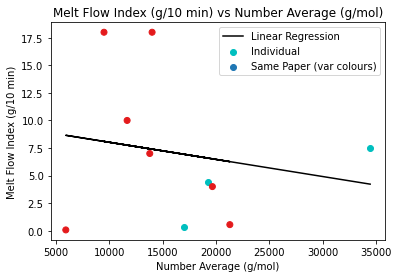

Mean squared error: 38.80
R2 score: 0.03

Choose the % content HDPE:
[1] - 70%
[2] - 80%
[3] - 90%
[4] - 100%
[q] - Quit

Please select a number option or q from the menu: q
User quit


In [ ]:
#  The main Loop which runs all the helper functions so that the menu options are stored in variables
#  To be used in other helper functions and complete linear regression using the correct values of input and output properties 

while True: 
    df = df.copy()

    # Assign the user input choices to variables 
    inputProp, outputProp, blend, imputation, testStands, quit = getMenu()

    if quit == False:
        
        # User helper functions to get required column names and filter the data frame based off user input variables
        valNames, tsNames = getColNames()
        blendDf = filterBlends(blend, df) 
        standardDf = filterStandards(tsNames, testStands, blendDf)
    
        # If there is no imputation use the column names to reduce the df to just the needed columns, removing null entires in getDataFrame()
        if imputation == 'none':
            colNames = valNames + tsNames + ['Paper']
            reducedDf = getDataFrame(colNames, standardDf)
            pass
         
        # If theres multivariate imputation, make a reduced tempDf and remove entries with more than 2 null values 
        elif imputation == 'multi':
            valNames += ['Paper']
            tempDf = standardDf[valNames]
            tempDf = tempDf.dropna(subset = valNames, axis = 0, thresh = 2)            
            
            # Replace value in paper col to -1 in missing func
            missingDf = missing(tempDf)

            # Complete multivariate imputation in multiImputation func
            impRes = multiImputation(missingDf)
            pass

        # For univariate imputation, make a reduced tempDf and remove entries with more than 2 null values 
        else: 
            valNames += ['Paper']
            tempDf = standardDf[valNames]
            tempDf = tempDf.dropna(subset = valNames, axis = 0, thresh = 2)            

            # Replace value in paper col to -1 in missing func
            missingDf = missing(tempDf)

            # Complete multivariate imputation in multiImputation func
            impRes = singleImputation(missingDf, imputation)

        y = []
        x = []
        label = []

        # For imputed results add the relevant values to the lists for x, y and the paper label
        if imputation != 'none': 
            for index, row in missingDf.iterrows():
                label.append(row[-2])

            for row in impRes:
                y.append(row[1])
                x.append(row[0])

        # For non-imputed results add the relevant values to the lists for x, y and the paper label
        else:
            for index, row in reducedDf.iterrows():
                y.append([float(row[1])])
                x.append([float(row[0])])
                label.append(row[-1])

        # convert the lists to np arrays
        y = np.array(y)
        x = np.array(x)

        # Run the linear regression function in a try catch statment 
        try: 
          linearReg(x, y, label)
        except Exception as e:
          print("ERROR : "+str(e))
            
    else:
        print("User quit")
        break
